<a href="https://colab.research.google.com/github/rajeshchengannur/DeepLearning/blob/main/DL103_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Neuron


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors

$S_{w,b}(x) =\frac{1}{1+e^{-(wx+b)}}$

In [50]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [51]:
#Lets test the function , We know that sigmoid goes from 0 to 1
sigmoid(1,0.5,0)

0.6224593312018546

In [52]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

In [53]:
type(X)
type(Y)

numpy.ndarray

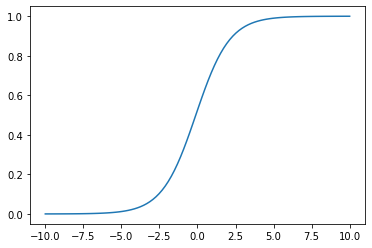

In [54]:
#We know that in the sigmoid function every element x,w,b are scalar. When we are passing a numpy array to function, it is doing python broad casting
# for each element of the array 
plt.plot(X,Y)
plt.show()

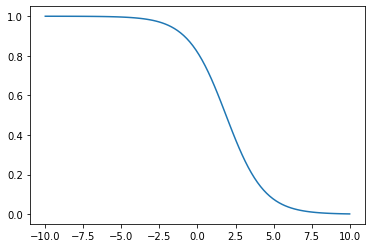

In [55]:
#I can flip the grph by changing the value of w from positve to negative
# if the change the value of b , the graph shifts
# we can change the value of w and b using sliders, in the code snippets , check for adding form fields
#google colab will interpret this as aslider
w = -0.8  #@param {type: "slider", min: -2, max: 2, step: 0.2}
b = 1.5 #@param {type: "slider", min: -2, max: 2, step: 0.2}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

# By changing the value of w, we can see that w is controlling the graph.
# and b is controlling the posiiton

$S_{w_1,w_2,b}(x_1,x_2) =\frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$
Sigmoid with 2 dimensional , 


In [56]:
def sigmoid_2D(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1 + w2*x2 +b)))

In [57]:
sigmoid_2D(1,0,0.5,0,0)

0.6224593312018546

In [58]:
#Lets google and see for 3 dimensional plot in matplotlib
X1= np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
# for every combination of x1 and x2 , I need to calculate y. For that I am using meshgrid
XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)


(100,) (100,) (100, 100) (100, 100)


In [59]:
w1 =0.5
w2 =0.5
b=0
Y=sigmoid_2D(XX1,XX2,w1,w2,b)

In [67]:
my_cmap =matplotlib.colors.LinearSegmentedColormap.from_list("",colors=["red","yellow","green"])

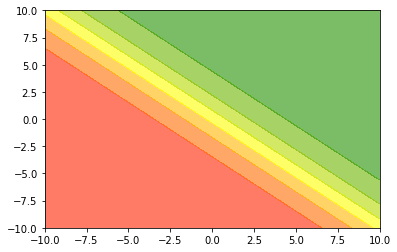

In [69]:
#Lets try a contour plot. that will display in a gradient form
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)
plt.show()

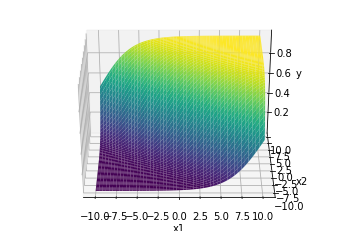

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(XX1, XX2, Y, 200, cmap='viridis', edgecolor='none')
ax.plot_surface(XX1, XX2, Y, cmap='viridis', edgecolor='none')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

#example, we'll use an elevation of 30 degrees (that is, 
#30 degrees above the x-y plane) and an azimuth of 270 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):
ax.view_init(30, 270)

# If you change the value of one of the weights, We can see that weight will do a major role 

#Compute loss for given dataset

For the given input and output identify the parameter of x and y. For that that we are using a grid search.
For that I need some randon numbers. random.random generate values between -1 and 1 , But i need values between -10 and 10 . so I multiply with the entire length (20) and subtracting 10

In [22]:
w_unknown = 0.5
b_unknown = 0.25
X=np.random.random(25)*20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

<function matplotlib.pyplot.show>

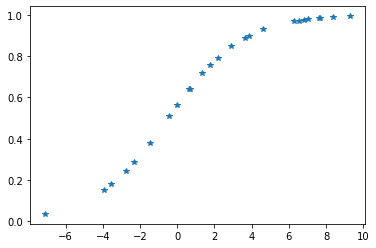

In [23]:
plt.plot(X,Y,'*')
plt.show

In [40]:
def calculate_loss(X,Y,w_est,b_est) :
  loss =0
  for x,y in zip(X,Y):
    loss +=(y-sigmoid(x,w_est,b_est))**2
    return loss

In [41]:
# from the values of X and Y identify the values of x and b. For that we are using mesh grid
# from the X Y plot we know that the negative value of w will twist the graph towards the opposite direction. So its better to take + values
#w = np.linspace(-1,1,100)
w = np.linspace(0,2,100)
b = np.linspace(-1,1,100)
WW,BB = np.meshgrid(w,b)
Loss = np.zeros(WW.shape)

In [42]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

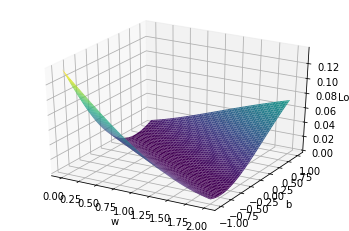

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');
#ax.view_init(30, 180)

In [46]:
#From this graph very difficult to identify the minimum values. so we will using grid serarch to identify the same
ij =np.argmin(Loss) # will list the index value after flattening the 3 dimensional array
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])
print (i,j,ij,i*Loss.shape[1])

32 70 3270 3200


In [47]:
print(WW[i,j],BB[i,j])

1.4141414141414144 -0.3535353535353535
